In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
#loading the dataset
df=pd.read_csv('/kaggle/input/online-shop-customer-sales-data/Online Shop Customer Sales Data.csv')
df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0


In [4]:
df.describe(include=[np.integer])

,Customer_id,Age,Gender,N_Purchases,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,0.671348,3.992477,1.308651,598.925603,0.630935,0.151027,0.250258
std,18993.813493,13.825466,0.469727,2.004370,1.081959,277.833635,0.996407,0.358078,0.433165
min,504308.000000,16.000000,0.000000,1.000000,0.000000,120.000000,0.000000,0.000000,0.000000
25%,520756.750000,28.000000,0.000000,2.000000,0.000000,358.000000,0.000000,0.000000,0.000000
50%,537205.500000,40.000000,1.000000,4.000000,1.000000,598.000000,0.000000,0.000000,0.000000
75%,553654.250000,51.000000,1.000000,6.000000,2.000000,840.000000,1.000000,0.000000,1.000000
max,570103.000000,63.000000,1.000000,7.000000,3.000000,1080.000000,3.000000,1.000000,1.000000


In [5]:
pd.to_datetime(df['Purchase_DATE']).dt.day

0        22
1        12
2        14
3        25
4        14
         ..
65791    15
65792     2
65793    29
65794    12
65795    23
Name: Purchase_DATE, Length: 65796, dtype: int64

<AxesSubplot:title={'center':'Age Distribution'}, ylabel='Frequency'>

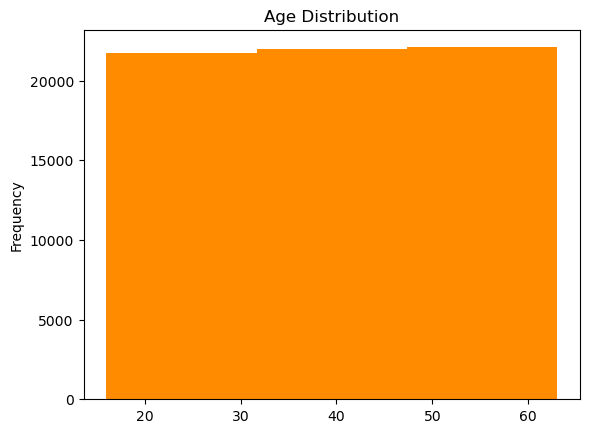

In [6]:
df['Age'].plot(kind='hist',title='Age Distribution',bins=3,xlabel='Age Distribution',color=['darkorange', 'gold', 'sandybrown'])

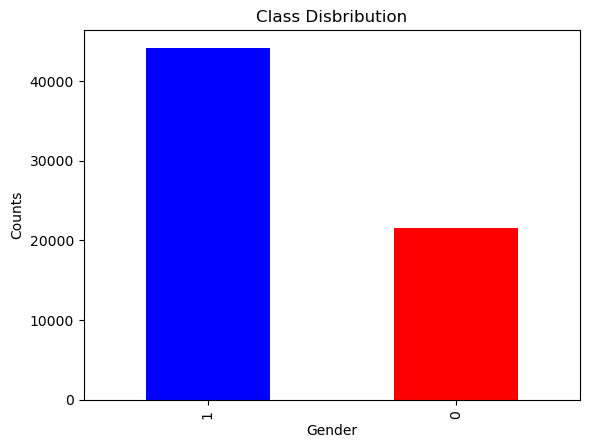

In [7]:
df['Gender'].value_counts().plot(kind='bar',title='Class Disbribution',xlabel='Gender',ylabel='Counts',color=['b','r'])
plt.show()

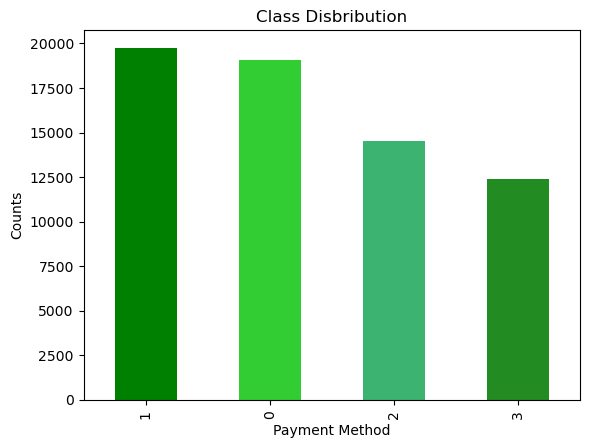

In [8]:
df['Pay_Method'].value_counts().plot(kind='bar',title='Class Disbribution',xlabel='Payment Method',ylabel='Counts',color=['green', 'limegreen', 'mediumseagreen', 'forestgreen'])
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


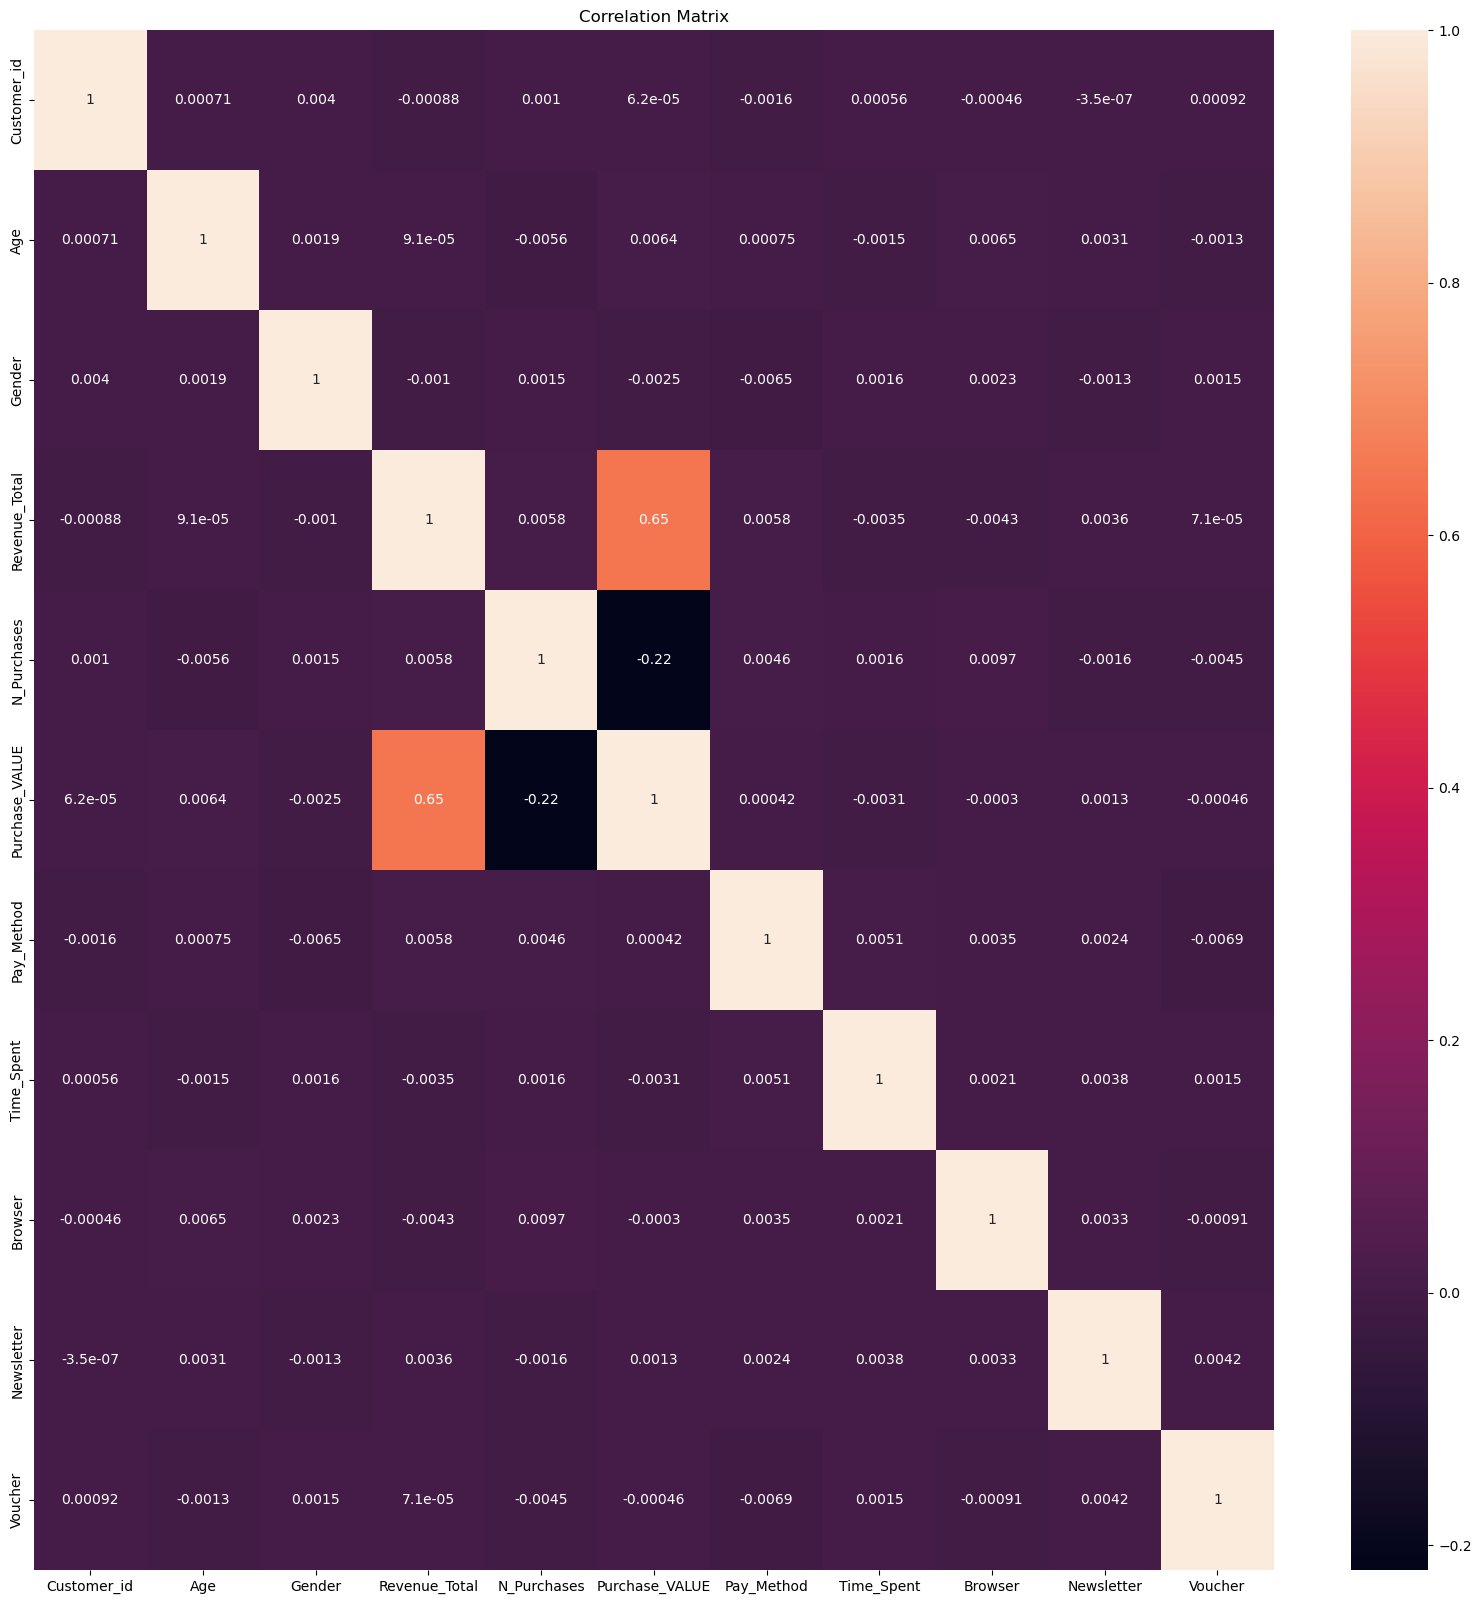

In [10]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [11]:
df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0


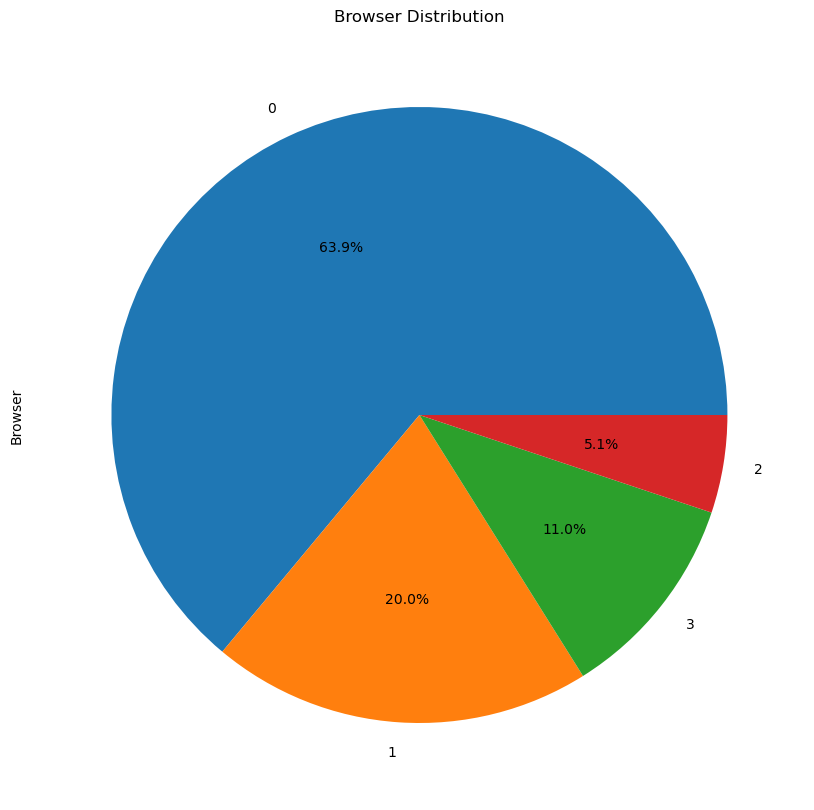

In [12]:
plt.figure(figsize=(20,10))
df['Browser'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Browser Distribution')
plt.show()

# Trying to Predicting the Pay_Method based on given features

In [13]:
df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0


In [40]:
def preprocess_input(df,scaler):
    df=df.copy()
    df=df.drop('Customer_id',axis=1)
    df['Purchase_year']=pd.to_datetime(df['Purchase_DATE']).dt.year.astype(np.int)
    df['Purchase_month']=pd.to_datetime(df['Purchase_DATE']).dt.month.astype(np.int)
    df['Purchase_day']=pd.to_datetime(df['Purchase_DATE']).dt.day.astype(np.int)
    df=df.drop('Purchase_DATE',axis=1)
    y=df['Pay_Method']
    x=df.drop('Pay_Method',axis=1)
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    scaler.fit(x_train)
    
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    return x_train,x_test,y_train,y_test

In [41]:
x_train,x_test,y_train,y_test=preprocess_input(df,MinMaxScaler())
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(46057, 12)
(19739, 12)
(46057,)
(19739,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

# Training the Model

In [42]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [44]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name,model.score(x_test,y_test))

Random Forest Classifier 0.28481686002330414
Decision Tree Classifier 0.2585237347383353
Logistic Regression 0.2999645372105983


LogisticRegression()

In [ ]:
model_lr.predict()

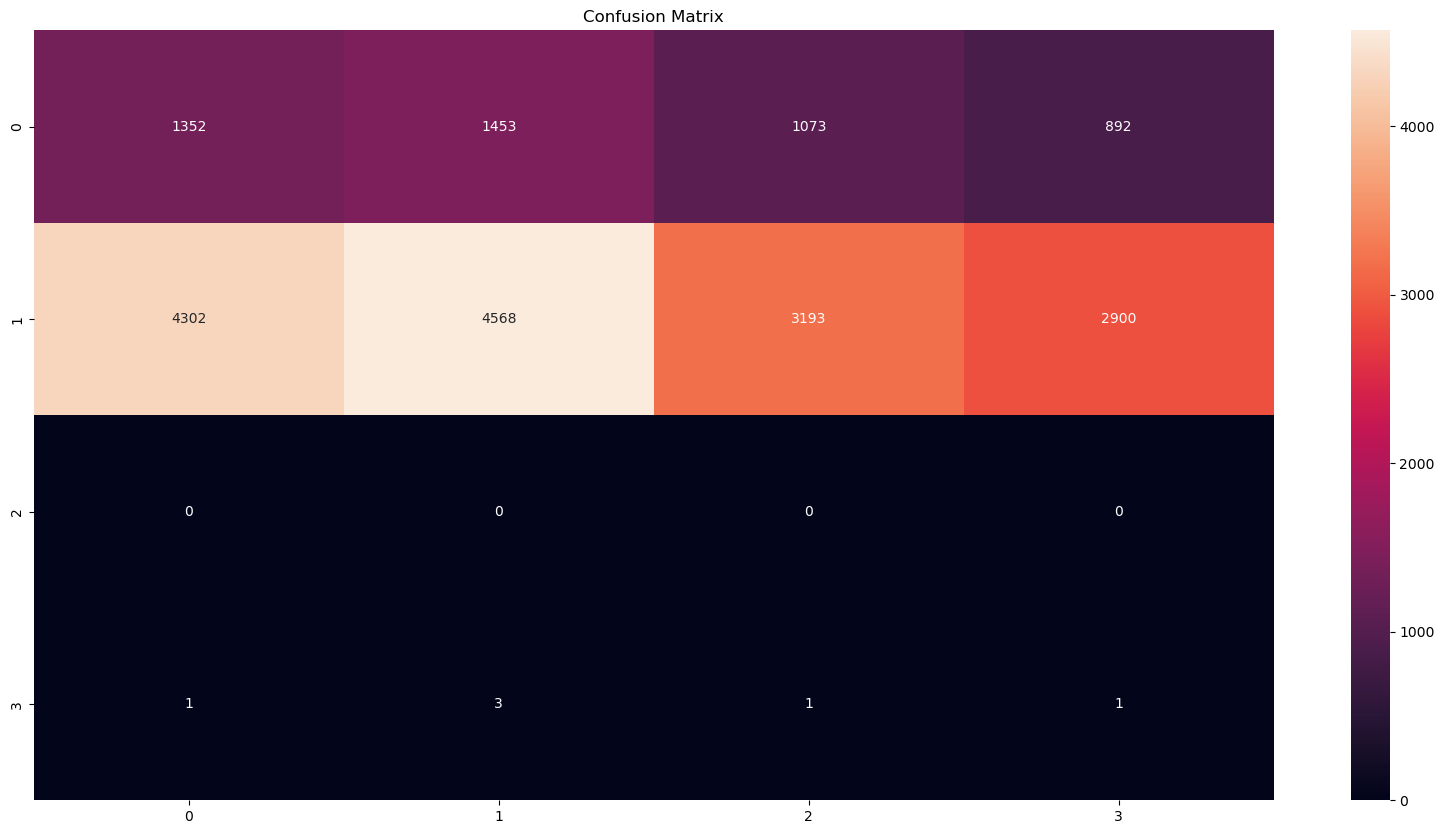

In [52]:
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred=model_lr.predict(x_test)
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [49]:
x_train

,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Time_Spent,Browser,Newsletter,Voucher,Purchase_year,Purchase_month,Purchase_day
0,0.000000,0.0,0.646465,0.166667,0.129811,0.404167,0.000000,1.0,0.0,0.0,0.909091,0.333333
1,0.553191,0.0,0.417508,0.333333,0.266032,0.179167,0.000000,0.0,0.0,0.0,0.636364,0.800000
2,0.446809,0.0,0.265993,0.666667,0.062509,0.878125,0.000000,1.0,0.0,0.0,0.363636,0.233333
3,0.723404,1.0,0.202020,0.166667,0.202354,0.502083,0.333333,0.0,0.0,0.0,0.090909,0.800000
4,0.595745,0.0,0.057239,0.500000,0.058519,0.402083,0.000000,0.0,0.0,0.0,0.000000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
46052,0.936170,1.0,0.513468,0.833333,0.450205,0.800000,0.000000,0.0,0.0,0.0,0.909091,0.433333
46053,0.489362,1.0,0.506734,0.833333,0.005025,0.290625,0.333333,0.0,0.0,0.0,0.909091,0.966667
46054,0.340426,1.0,0.483165,0.333333,0.404558,0.588542,0.000000,0.0,1.0,0.0,1.000000,0.066667
46055,0.531915,0.0,0.580808,0.666667,0.040821,0.242708,0.000000,1.0,0.0,0.0,0.272727,0.766667


In [53]:
df['Pay_Method'].value_counts()

1    19754
0    19075
2    14551
3    12416
Name: Pay_Method, dtype: int64